# Final project on Fruit Classification using CNN

## Dataset



dataset can be found at: https://www.kaggle.com/datasets/sshikamaru/fruit-recognition

## About Dataset
Total number of images: 22495.

Training set size: 16854 images (one fruit or vegetable per image).

Test set size: 5641 images (one fruit or vegetable per image).

Number of classes: 33 (fruits and vegetables).

Image size: 100x100 pixels.

Training data filename format: [fruit/vegetable name]_[id].jpg (e.g. Apple Braeburn_100.jpg). Many images are also rotated, to help training.

Testing data filename format: [4 digit id].jpg (e.g. 0001.jpg)

## Content
train - the training folder that contains 33 subfolders in which training images for each fruit/vegetable are located. There is a total of 16854 images.
test - the testing folder that contains 5641 testing images
sampleSubmission.csv - a sample submission file in the correct format, with id number and string label


In [411]:
import pandas as pd
import tensorflow as tf
import numpy as np
import os
import random
import pathlib
import matplotlib.pyplot as plt
import seaborn as sns 
import tensorflow as tf 
import matplotlib.image as mpimg
import time


from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.utils import load_img, img_to_array


# Import and pre-process data

### Traning data

In [412]:

# Set the paths for your train and test data
train_path = "../archive (2)/train/train/"
# test_path = "../archive (2)/test/test/"

In [413]:
# Function to view random images from a target directory
def view_random_image(target_dir, target_class):
    target_folder = os.path.join(target_dir, target_class)
    random_image = random.sample(os.listdir(target_folder), 1)[0]
    img = plt.imread(os.path.join(target_folder, random_image))
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')
    return img
#     print(target_folder)

In [414]:
# Get the class names from the train directory
data_dir = pathlib.Path(train_path)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))

class_names


array(['Apple Braeburn', 'Apple Granny Smith', 'Apricot', 'Avocado',
       'Banana', 'Blueberry', 'Cactus fruit', 'Cantaloupe', 'Cherry',
       'Clementine', 'Corn', 'Cucumber Ripe', 'Grape Blue', 'Kiwi',
       'Lemon', 'Limes', 'Mango', 'Onion White', 'Orange', 'Papaya',
       'Passion Fruit', 'Peach', 'Pear', 'Pepper Green', 'Pepper Red',
       'Pineapple', 'Plum', 'Pomegranate', 'Potato Red', 'Raspberry',
       'Strawberry', 'Tomato', 'Watermelon'], dtype='<U18')

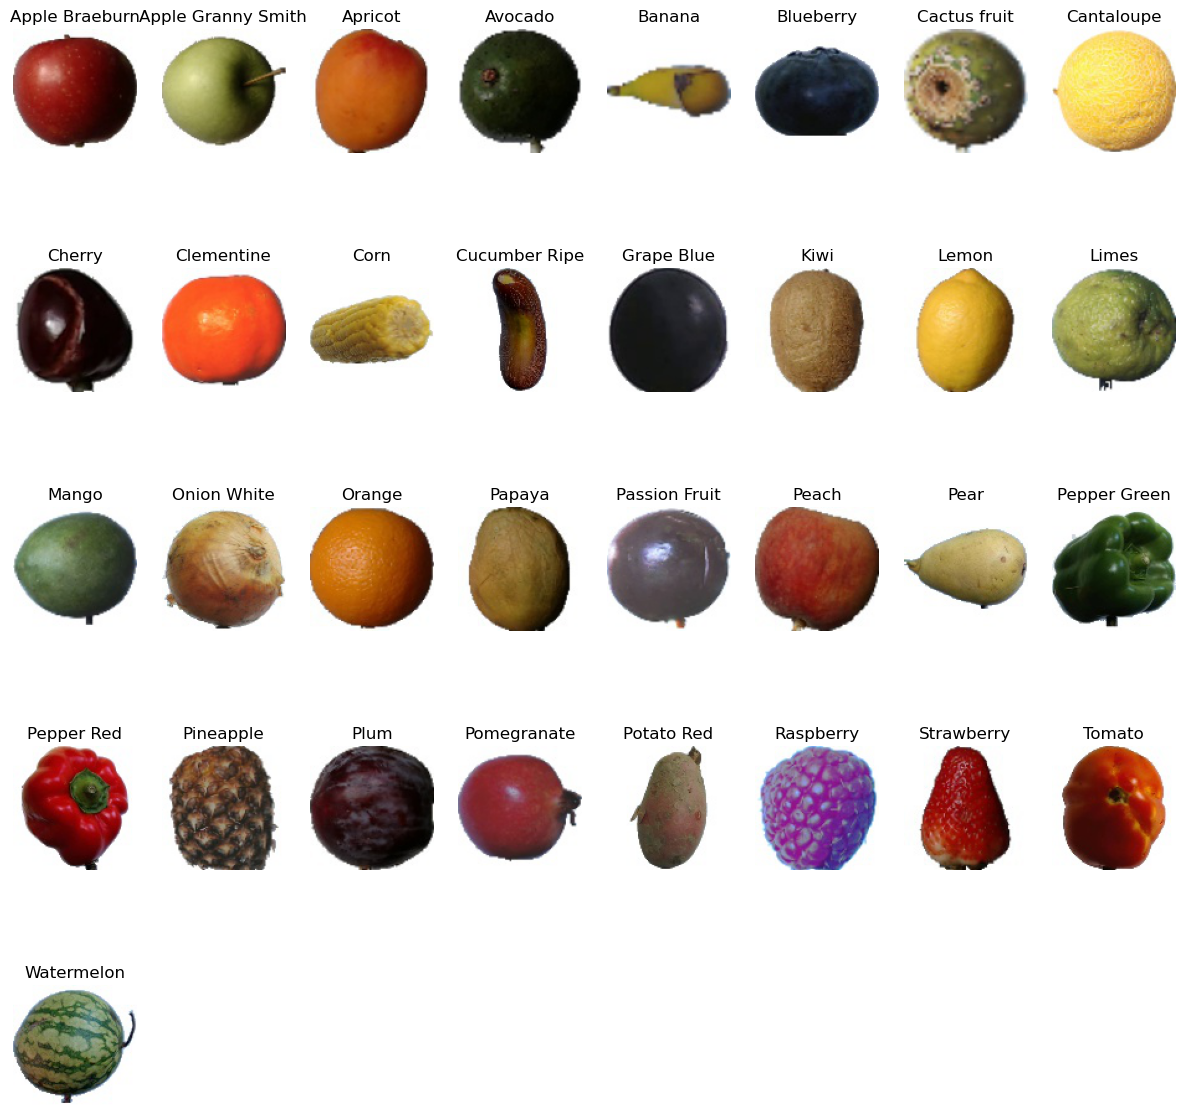

In [415]:

# Display random images from each class in the training dataset
plt.figure(figsize=(15, 15))
for i in range(len(class_names)):
    plt.subplot(5, 8, i + 1)
    img = view_random_image(target_dir=train_path, target_class=class_names[i])


In [483]:
# Load and preprocess training data
train_data = {'path': [], 'filename': [], 'label': []}
for dirpath, dirnames, filenames in os.walk(train_path):
    for f in filenames:
        train_data['path'].append(dirpath)
        train_data['filename'].append(f)
        train_data['label'].append(f.split('_')[0])

# print(train_data)


In [417]:

print(i)

train_val_data_df = pd.DataFrame(train_data)


32


In [418]:
train_val_data_df.size

50562

In [420]:
train_val_data_df.size

50562

In [421]:
images = []
labels = []
for _, d in train_val_data_df.iterrows():
    img = load_img(os.path.join(d['path'], d['filename']))
    images.append(img_to_array(img))
    labels.append(d['label'])

In [422]:
# # Clean up memory
# del reduced_train_val_data_df



In [423]:
images = np.array(images)
labels = np.array(labels)

In [424]:
# # cleaning up if you are having memory issues
# del images
# del lables

In [425]:
labels

array(['Apple Braeburn', 'Apple Braeburn', 'Apple Braeburn', ...,
       'Watermelon', 'Watermelon', 'Watermelon'], dtype='<U18')

In [426]:
images

array([[[[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        ...,

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
       

### End

###  Data preprocessing (Training dataset)

In [427]:

# Convert labels to one-hot encoded categorical data
class_indices = dict(zip(class_names, range(len(class_names))))
labels_encoded = list(map(class_indices.get, labels))
label_categorical = tf.keras.utils.to_categorical(labels_encoded, 
                                                  num_classes=len(class_names), dtype='uint8')

In [428]:

# Split the data into training and validation sets
train_im, valid_im, train_lab, valid_lab = train_test_split(images, 
                                                            label_categorical, test_size=0.20,
                                                            stratify=label_categorical,
                                                            random_state=32, shuffle=True)


In [429]:
print ("train data shape after the split: ", train_im.shape)
print ('new validation data shape: ', valid_im.shape)
print ("validation labels shape: ", valid_lab.shape)

train data shape after the split:  (13483, 100, 100, 3)
new validation data shape:  (3371, 100, 100, 3)
validation labels shape:  (3371, 33)


In [430]:
print ('train im and label types: ', type(train_im), type(train_lab))


train im and label types:  <class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [431]:
training_data = tf.data.Dataset.from_tensor_slices((train_im, train_lab))
validation_data = tf.data.Dataset.from_tensor_slices((valid_im, valid_lab))
# test_data = tf.data.Dataset.from_tensor_slices(test_images)


In [432]:
print ('check types; ', type(training_data), type(validation_data)) #type(test_data))


check types;  <class 'tensorflow.python.data.ops.dataset_ops.TensorSliceDataset'> <class 'tensorflow.python.data.ops.dataset_ops.TensorSliceDataset'>


In [433]:
### check using element_spec

print (training_data.element_spec)
print (validation_data.element_spec)

(TensorSpec(shape=(100, 100, 3), dtype=tf.float32, name=None), TensorSpec(shape=(33,), dtype=tf.uint8, name=None))
(TensorSpec(shape=(100, 100, 3), dtype=tf.float32, name=None), TensorSpec(shape=(33,), dtype=tf.uint8, name=None))


In [434]:
### create an iterator and turn it into numpy array 
train_iter = iter(training_data)
print(next(train_iter)[0].numpy(), '\n', next(train_iter)[1].numpy(), 
      np.argmax(next(train_iter)[1].numpy()))

train_iter_im, train_iter_label = next(iter(training_data))
print (train_iter_im.numpy().shape, train_iter_label.numpy().shape)

train_iter_im1, train_iter_label1 = next(training_data.as_numpy_iterator())
print (train_iter_im1.shape, train_iter_label1.shape)

check_list = list(training_data.as_numpy_iterator())
print (len(check_list), check_list[1])


[[[239. 255. 248.]
  [245. 255. 255.]
  [251. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[244. 255. 250.]
  [248. 255. 255.]
  [254. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[249. 255. 253.]
  [253. 254. 255.]
  [255. 254. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 ...

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]] 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] 31
(100, 100, 3) (33,)
(100, 100, 3) (33,)
13483 (array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 25

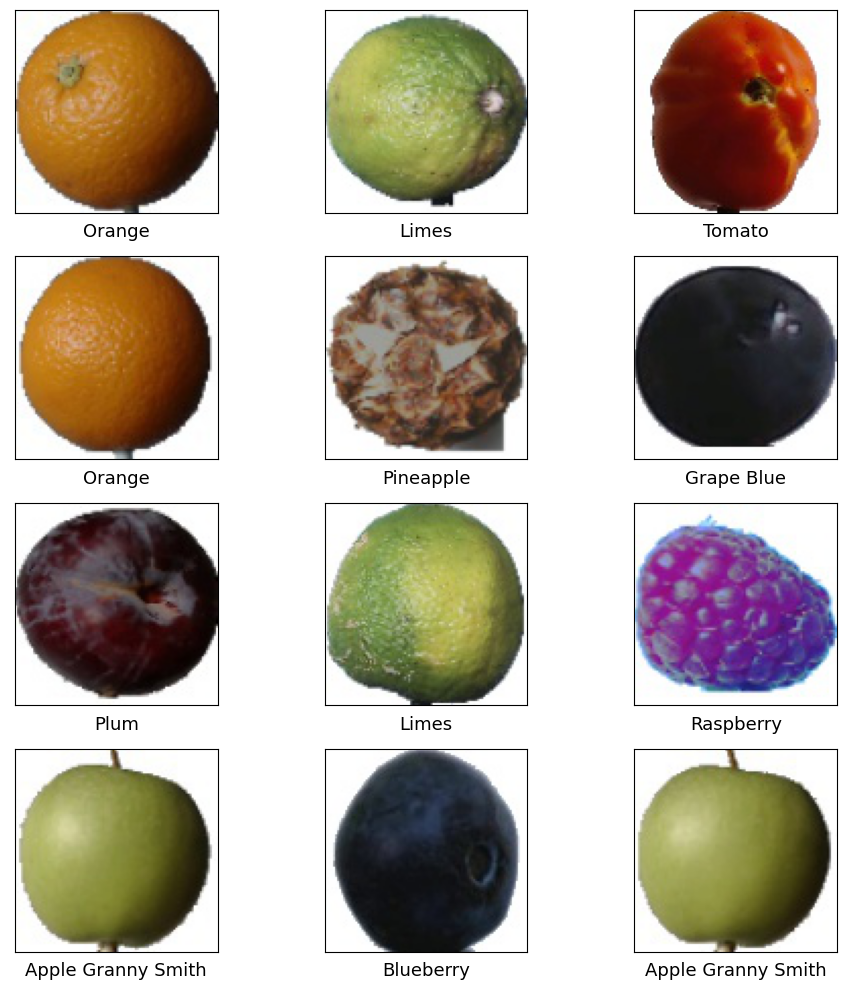

In [435]:
fig = plt.figure(figsize=(10,10))
for i in range(12):
    plt.subplot(4,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(check_list[i][0]/255.)
    plt.xlabel(class_names[np.argmax(check_list[i][1])], fontsize=13)
plt.tight_layout()    
plt.show()

In [436]:
rescale_data = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1/255.)
])

In [437]:

# data augmentation
data_augmenation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip(mode = "horizontal")
    #     layers.experimental.preprocessing.RandomRotation(0.1)
    
    
])


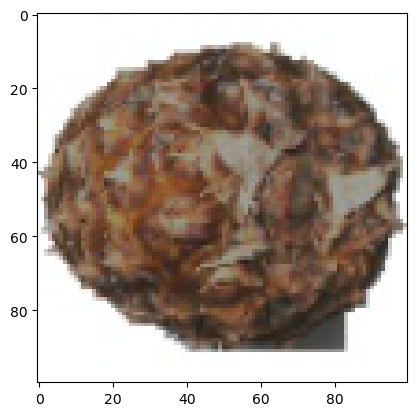

In [438]:
random_image_index = random.randint(0,len(train_im))
img = rescale_data(train_im[random_image_index])
img = data_augmenation(img)
plt.imshow(img)


In [439]:
# Define batch size and data augmentation
BATCH_SIZE = 128
AUTOTUNE = tf.data.AUTOTUNE

def prepare(ds, shuffle=False, augment=False, test=False):
    if test:
        ds = ds.map(lambda x: (rescale_data(x)), num_parallel_calls=AUTOTUNE)
    else:
        ds = ds.map(lambda x, y: (rescale_data(x), y), num_parallel_calls=AUTOTUNE)
    
    if shuffle:
        ds = ds.shuffle(1000)
    
    ds = ds.batch(BATCH_SIZE)
    
    if augment:
        ds = ds.map(lambda x, y: (data_augmenation(x, training=True), y),
                    num_parallel_calls=AUTOTUNE)
    
    return ds.prefetch(buffer_size=AUTOTUNE)

In [440]:
# Prepare training and validation datasets
train_ds = prepare(training_data, shuffle=True, augment=True)
val_ds = prepare(validation_data)


### End

### Testing Dataset

In [441]:

# Set the path to the directory containing the images
test_path = "../archive (2)/test/test/"

# Get a list of all the files (images) in the directory
file_list = os.listdir(test_path)

# Create a list to store the image URLs
image_urls = []

In [442]:
# Loop through each file in the directory and get the full URL (file path) of the image
for file in file_list:
    image_url = os.path.join(test_path, file)
    image_urls.append(image_url)

# Create a DataFrame to store the image URLs
data = pd.DataFrame({"image": image_urls})

In [443]:

# Save the DataFrame to a CSV file
csv_file_image = "kenneth_test_images.csv"
data.to_csv(csv_file_image, index=False)

print("CSV file created and saved successfully!")


CSV file created and saved successfully!


##### displaying images in test file


In [444]:
# displaying images in test file

# Read the CSV file into a DataFrame
csv_file = csv_file_image
data = pd.read_csv(csv_file)

In [511]:
data.head()

image
0  ../archive (2)/test/test/0013.jpg
1  ../archive (2)/test/test/0014.jpg
2  ../archive (2)/test/test/0015.jpg
3  ../archive (2)/test/test/0016.jpg
4  ../archive (2)/test/test/0017.jpg

In [445]:
# Get the number of rows in the DataFrame
num_samples = data.shape[0]

# Generate 10 random indices to select random images from the DataFrame
random_indices = random.sample(range(num_samples), 10)

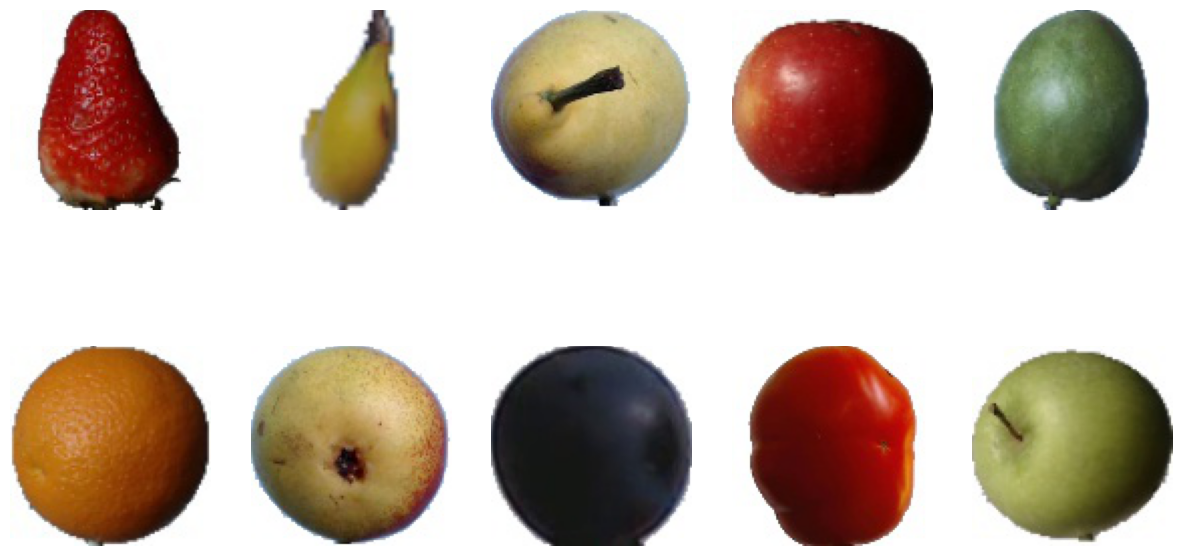

In [446]:
# Loop through the random indices and display the corresponding images
plt.figure(figsize=(15, 8))
for i, index in enumerate(random_indices):
    # Get the image URL and label from the DataFrame
    image_url = data.iloc[index]['image']
#     label = data.iloc[index]['label']

    # Read and display the image
    img = mpimg.imread(image_url)
    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
#     plt.title(label)
    plt.axis('off')

plt.show()

In [447]:
# function to randomly display images 

def display_random_images(csv_file, num_images=10):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(csv_file)
    
    # Check if the DataFrame has enough rows to display the specified number of images
    num_rows = len(df)
    if num_rows < num_images:
        num_images = num_rows

    # Get a random sample of rows from the DataFrame
    random_samples = df.sample(n=num_images, random_state=42)
    
    # Display the random images
    plt.figure(figsize=(12, 8))
    for i, row in random_samples.iterrows():
        img = mpimg.imread(row['image'])
        plt.subplot(2, 5, i % 10 + 1)  # Loop counter i % 10 to ensure the subplot index is within range
        plt.imshow(img)
#         plt.title(row['label'])
        plt.axis('off')

    plt.show()

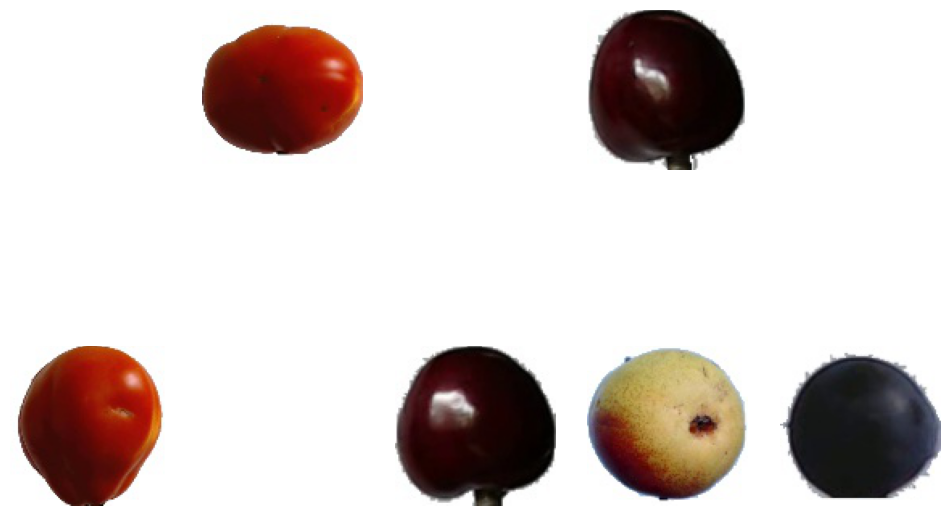

In [448]:
# Usage example:
display_random_images(csv_file, num_images=10)

In [449]:
# Get the class names from the train directory
data_dir = pathlib.Path(test_path)
# class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))

# class_names

# Generic functions

#### predict random image

In [450]:

def predict_random_image(model, test_dataset, class_names):
    # Get the random test image path
    random_index = np.random.randint(len(test_dataset))
    random_test_image_path = test_dataset.loc[random_index, 'image']

    # Preprocess the image
    preprocessed_image = preprocess_image(random_test_image_path)

    # Make prediction using the model
    prediction = model.predict(preprocessed_image)

    # Assuming 'prediction' is an array of predicted probabilities for each class
    predicted_label_index = np.argmax(prediction, axis=1)[0]

    # Map the predicted label index to the corresponding class name
    predicted_label = class_names[predicted_label_index]

    return random_test_image_path, predicted_label


In [451]:
#calling the function

# model = 
# test_dataset = 
# class_names = 

# def predict_random_image(model, test_dataset, class_names)

In [452]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def load_test_dataset(csv_file):
    return pd.read_csv(csv_file)

def preprocess_image(image_path, target_size=(100, 100)):
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0
    return img_array

def predict_image(model, image_path, class_names):
    preprocessed_image = preprocess_image(image_path)
    prediction = model.predict(preprocessed_image)
    predicted_label_index = tf.argmax(prediction, axis=1).numpy()[0]
    predicted_label = class_names[predicted_label_index]
    return predicted_label

def plot_random_predictions(model, csv_file):
    # Load the test dataset
    test_dataset = load_test_dataset(csv_file)

    # Define class names
    class_names = ['Apple Braeburn', 'Apple Granny Smith',
                   'Apricot', 'Avocado', 'Banana', 'Blueberry', 'Cactus fruit',
                   'Cantaloupe', 'Cherry', 'Clementine', 'Corn', 
                   'Cucumber Ripe', 'Grape Blue', 'Kiwi', 'Lemon',
                   'Limes', 'Mango', 'Onion White', 'Orange', 'Papaya', 
                   'Passion Fruit', 'Peach', 'Pear',
                   'Pepper Green', 'Pepper Red', 'Pineapple', 'Plum', 
                   'Pomegranate', 'Potato Red', 'Raspberry',
                   'Strawberry', 'Tomato', 'Watermelon']

    # Plot predictions for 10 random images
    num_predictions = 10
    plt.figure(figsize=(15, 15))
    for i in range(num_predictions):
        random_index = random.randint(0, len(test_dataset) - 1)
        random_test_image_path = test_dataset.loc[random_index, 'image']
        predicted_label = predict_image(model, random_test_image_path, class_names)
        image = mpimg.imread(random_test_image_path)

        plt.subplot(5, 2, i + 1)
        plt.imshow(image)
        plt.title(f"Predicted Label: {predicted_label}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()




In [453]:
# # Usage

# model = ...  # Your trained model

# # Path to the CSV file containing the test dataset
# csv_file = csv_file

# # Plot random predictions using the defined function
# plot_random_predictions(model, csv_file)

#### Traninig and timing model

In [454]:


def train_and_time_model(model=None, train_data=None, 
                         train_labels=None, validation_data=None, 
                         validation_labels=None,
                         epochs=1, batch_size=32):
    if model is None or train_data is None or train_labels is None or 
    validation_data is None or validation_labels is None:
        print("Please provide all required inputs for training.")
        return None
    
    start_time = time.time()
    
    history = model.fit(train_data, train_labels, epochs=epochs, 
                        batch_size=batch_size, 
                        validation_data=(validation_data, validation_labels))
    
    end_time = time.time()
    elapsed_time = end_time - start_time
    
    print(f"Training completed in {elapsed_time:.2f} seconds")
    
    return history







In [455]:
# # usage

# # Building the model

# num_epochs = 5
# batch_size = 32
# model = base_model
# train_data = train_images
# train_labels = train_labels
# validation_data = test_images
# validation_labels = test_labels



# history = train_and_time_model(model, train_data, train_labels,
#                                validation_data, validation_labels, 
#                                epochs=num_epochs, batch_size=batch_size)


#### End 

# Building models

#### No transfere learning model

In [523]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=5, 
                          kernel_size = 3,
                          activation = "relu",
                          input_shape = (100,100,3)),
    tf.keras.layers.MaxPool2D(pool_size =2,
                             padding='valid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(num_classes, activation="softmax")
])

model.compile(loss="categorical_crossentropy",
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

In [524]:
model.summary()

Model: "sequential_71"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_91 (Conv2D)          (None, 98, 98, 5)         140       
                                                                 
 max_pooling2d_91 (MaxPoolin  (None, 49, 49, 5)        0         
 g2D)                                                            
                                                                 
 flatten_62 (Flatten)        (None, 12005)             0         
                                                                 
 dense_212 (Dense)           (None, 33)                396198    
                                                                 
Total params: 396,338
Trainable params: 396,338
Non-trainable params: 0
_________________________________________________________________


In [525]:
#Fit the model on training data 
model.fit(train_ds, epochs =3,
                       validation_data= val_ds)

Epoch 1/3
106/106 [==============================] - 176s 2s/step - loss: 1.0922 - accuracy: 0.7828 - val_loss: 1.8752 - val_accuracy: 0.5518
Epoch 2/3
106/106 [==============================] - 192s 2s/step - loss: 0.0856 - accuracy: 0.9909 - val_loss: 2.4784 - val_accuracy: 0.4826
Epoch 3/3
106/106 [==============================] - 193s 2s/step - loss: 0.0323 - accuracy: 0.9985 - val_loss: 2.8271 - val_accuracy: 0.4942


In [532]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Define the input shape (100, 100, 3) and the number of classes
input_shape = (100, 100, 3)
num_classes = 33  # Change this to the number of output classes you have

# Build a Sequential model
model_new = tf.keras.models.Sequential()

# Convolutional Layer 1
model_new.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=input_shape))
model_new.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Layer 2
model_new.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model_new.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening Layer
model_new.add(Flatten())

# Fully Connected Layer
model_new.add(Dense(128, activation='relu'))

# Output Layer with 'num_classes' units and softmax activation for multi-class classification
model_new.add(Dense(num_classes, activation='softmax'))

# Compile the model
model_new.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

# Display the model summary
model_new.summary()


Model: "sequential_74"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_98 (Conv2D)          (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_98 (MaxPoolin  (None, 49, 49, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_99 (Conv2D)          (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_99 (MaxPoolin  (None, 23, 23, 64)       0         
 g2D)                                                            
                                                                 
 flatten_65 (Flatten)        (None, 33856)             0         
                                                                 
 dense_217 (Dense)           (None, 128)             

In [533]:
model_new.summary()

Model: "sequential_74"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_98 (Conv2D)          (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_98 (MaxPoolin  (None, 49, 49, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_99 (Conv2D)          (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_99 (MaxPoolin  (None, 23, 23, 64)       0         
 g2D)                                                            
                                                                 
 flatten_65 (Flatten)        (None, 33856)             0         
                                                                 
 dense_217 (Dense)           (None, 128)             

In [ ]:
#Fit the model on training data 
model_new.fit(train_ds, epochs =3,
                       validation_data= val_ds)

Epoch 1/3
106/106 [==============================] - 855s 8s/step - loss: 0.7009 - accuracy: 0.8157 - val_loss: 1.5251 - val_accuracy: 0.6372
Epoch 2/3
106/106 [==============================] - 845s 8s/step - loss: 0.0096 - accuracy: 0.9986 - val_loss: 1.8863 - val_accuracy: 0.6354
Epoch 3/3
 86/106 [=======================>......] - ETA: 12:25 - loss: 0.0014 - accuracy: 1.0000

In [531]:
# Much more deeper hidden layers

# Define the input shape (100, 100, 3) and the number of classes
input_shape = (100, 100, 3)
num_classes = 33  # Change this to the number of output classes you have


def build_deeper_cnn(input_shape, num_classes):
    model = models.Sequential()

    # First Convolutional Block
    model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))

    # Second Convolutional Block
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Third Convolutional Block
    model.add(layers.Conv2D(256, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Fourth Convolutional Block
    model.add(layers.Conv2D(512, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Fifth Convolutional Block
    model.add(layers.Conv2D(512, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Flatten the output for Dense layers
    model.add(layers.Flatten())

    # First Dense layer
    model.add(layers.Dense(4096, activation='relu'))

    # Second Dense layer
    model.add(layers.Dense(4096, activation='relu'))

    # Output layer with 'num_classes' units and softmax activation for multi-class classification
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model



In [457]:
# Build the deeper model
deeper_model = build_deeper_cnn(input_shape, num_classes)

In [458]:
# Print the model summary
deeper_model.summary()

Model: "sequential_56"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_66 (Conv2D)          (None, 98, 98, 64)        1792      
                                                                 
 max_pooling2d_66 (MaxPoolin  (None, 49, 49, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_67 (Conv2D)          (None, 47, 47, 128)       73856     
                                                                 
 max_pooling2d_67 (MaxPoolin  (None, 23, 23, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_68 (Conv2D)          (None, 21, 21, 256)       295168    
                                                                 
 max_pooling2d_68 (MaxPoolin  (None, 10, 10, 256)    

In [459]:
# Compile the model
deeper_model.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

In [460]:
# Train the base model on CIFAR-10 data
num_epochs = 5
batch_size = 32
deeper_model.fit(train_ds, epochs=num_epochs, batch_size=batch_size, validation_data=val_ds)




Epoch 1/5
106/106 [==============================] - 518s 5s/step - loss: 1.6031 - accuracy: 0.4906 - val_loss: 4.6771 - val_accuracy: 0.4316
Epoch 2/5
106/106 [==============================] - 457s 4s/step - loss: 0.0836 - accuracy: 0.9736 - val_loss: 5.7399 - val_accuracy: 0.4705
Epoch 3/5
106/106 [==============================] - 457s 4s/step - loss: 0.0524 - accuracy: 0.9829 - val_loss: 6.4431 - val_accuracy: 0.4417
Epoch 4/5
106/106 [==============================] - 464s 4s/step - loss: 0.0033 - accuracy: 0.9994 - val_loss: 8.5452 - val_accuracy: 0.5034
Epoch 5/5
106/106 [==============================] - 463s 4s/step - loss: 5.3001e-05 - accuracy: 1.0000 - val_loss: 8.6676 - val_accuracy: 0.5076


In [461]:
# # Evaluate the model on the test dataset
# loss, accuracy = deeper_model.evaluate(train_ds)
# print("Test accuracy:", accuracy)
# print("Test accuracy:", loss)

#### End

#### Building more shallower model

In [484]:
from tensorflow.keras import layers, models

# Define the input shape (100, 100, 3) and the number of classes
input_shape = (100, 100, 3)
num_classes = 33  # Change this to the number of output classes you have

def build_shallower_cnn(input_shape, num_classes):
    model = models.Sequential()

    # First Convolutional Block
    model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))

    # Second Convolutional Block
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Third Convolutional Block
    model.add(layers.Conv2D(256, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Flatten the output for Dense layers
    model.add(layers.Flatten())

    # First Dense layer
    model.add(layers.Dense(512, activation='relu'))

    # Output layer with 'num_classes' units and softmax activation for multi-class classification
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

# Create the shallower CNN model
shallower_cnn_model = build_shallower_cnn(input_shape, num_classes)
shallower_cnn_model.summary()


Model: "sequential_61"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_74 (Conv2D)          (None, 98, 98, 64)        1792      
                                                                 
 max_pooling2d_74 (MaxPoolin  (None, 49, 49, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_75 (Conv2D)          (None, 47, 47, 128)       73856     
                                                                 
 max_pooling2d_75 (MaxPoolin  (None, 23, 23, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_76 (Conv2D)          (None, 21, 21, 256)       295168    
                                                                 
 max_pooling2d_76 (MaxPoolin  (None, 10, 10, 256)    

In [485]:
# Compile the model
shallower_cnn_model.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

In [486]:
# Train the base model on CIFAR-10 data
num_epochs = 5
batch_size = 32
shallower_cnn_model.fit(train_ds, epochs=num_epochs, batch_size=batch_size, validation_data=val_ds)




Epoch 1/5
106/106 [==============================] - 1064s 10s/step - loss: 0.5544 - accuracy: 0.8508 - val_loss: 3.3895 - val_accuracy: 0.5951
Epoch 2/5
106/106 [==============================] - 978s 9s/step - loss: 0.0012 - accuracy: 0.9999 - val_loss: 3.4089 - val_accuracy: 0.5974
Epoch 3/5
106/106 [==============================] - 991s 9s/step - loss: 0.0269 - accuracy: 0.9925 - val_loss: 5.3288 - val_accuracy: 0.5500
Epoch 4/5
106/106 [==============================] - 961s 9s/step - loss: 0.0494 - accuracy: 0.9887 - val_loss: 4.5918 - val_accuracy: 0.5310
Epoch 5/5
106/106 [==============================] - 1067s 10s/step - loss: 5.7550e-05 - accuracy: 1.0000 - val_loss: 4.7585 - val_accuracy: 0.5313


In [493]:
custom_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(100, 100, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [494]:
custom_model.summary()

Model: "sequential_63"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_81 (Conv2D)          (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_81 (MaxPoolin  (None, 49, 49, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_82 (Conv2D)          (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_82 (MaxPoolin  (None, 23, 23, 64)       0         
 g2D)                                                            
                                                                 
 flatten_53 (Flatten)        (None, 33856)             0         
                                                                 
 dense_202 (Dense)           (None, 128)             

In [495]:
# Compile the model
custom_model.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

In [499]:
# Train the base model on CIFAR-10 data
num_epochs = 15
batch_size = 32
custom_model.fit(train_ds, epochs=num_epochs, batch_size=batch_size, validation_data=val_ds)




Epoch 1/15
106/106 [==============================] - 205s 2s/step - loss: 1.1602e-04 - accuracy: 1.0000 - val_loss: 2.9163 - val_accuracy: 0.6158
Epoch 2/15
106/106 [==============================] - 200s 2s/step - loss: 8.9997e-05 - accuracy: 1.0000 - val_loss: 2.9781 - val_accuracy: 0.6123
Epoch 3/15
106/106 [==============================] - 198s 2s/step - loss: 7.0951e-05 - accuracy: 1.0000 - val_loss: 3.0506 - val_accuracy: 0.6069
Epoch 4/15
106/106 [==============================] - 198s 2s/step - loss: 5.7299e-05 - accuracy: 1.0000 - val_loss: 3.0982 - val_accuracy: 0.6114
Epoch 5/15
106/106 [==============================] - 199s 2s/step - loss: 4.7578e-05 - accuracy: 1.0000 - val_loss: 3.1560 - val_accuracy: 0.6081
Epoch 6/15
106/106 [==============================] - 196s 2s/step - loss: 4.0739e-05 - accuracy: 1.0000 - val_loss: 3.1903 - val_accuracy: 0.6087
Epoch 7/15
106/106 [==============================] - 200s 2s/step - loss: 3.4719e-05 - accuracy: 1.0000 - val_loss: 3

KeyboardInterrupt: 

################################## original

In [504]:
original_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=5, 
                          kernel_size = 3,
                          activation = "relu",
                          input_shape = (100,100,3)),
    tf.keras.layers.MaxPool2D(pool_size =2,
                             padding='valid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(num_classes, activation="softmax")
])

original_model.compile(loss="categorical_crossentropy",
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

original_model.summary()

Model: "sequential_66"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_85 (Conv2D)          (None, 98, 98, 5)         140       
                                                                 
 max_pooling2d_85 (MaxPoolin  (None, 49, 49, 5)        0         
 g2D)                                                            
                                                                 
 flatten_56 (Flatten)        (None, 12005)             0         
                                                                 
 dense_206 (Dense)           (None, 33)                396198    
                                                                 
Total params: 396,338
Trainable params: 396,338
Non-trainable params: 0
_________________________________________________________________


In [509]:
print(num_classes)

33


In [505]:
#Fit the model on training data 
history = original_model.fit(train_ds,
                       epochs =5,
                       validation_data= val_ds)

Epoch 1/5
106/106 [==============================] - 173s 2s/step - loss: 0.7775 - accuracy: 0.8178 - val_loss: 1.3879 - val_accuracy: 0.6633
Epoch 2/5
106/106 [==============================] - 357s 3s/step - loss: 0.0263 - accuracy: 0.9979 - val_loss: 1.5508 - val_accuracy: 0.6517
Epoch 3/5
106/106 [==============================] - 286s 3s/step - loss: 0.0087 - accuracy: 1.0000 - val_loss: 1.6530 - val_accuracy: 0.6571
Epoch 4/5
106/106 [==============================] - 78s 738ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 1.7460 - val_accuracy: 0.6446
Epoch 5/5
106/106 [==============================] - 72s 680ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 1.8200 - val_accuracy: 0.6565


In [506]:
print(history)

<AxesSubplot:>

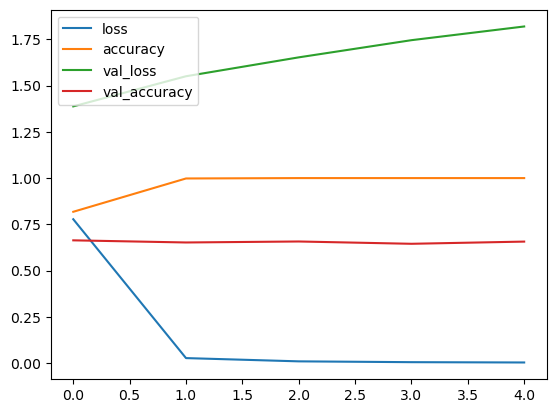

In [507]:
#loss and accuracy plot 
pd.DataFrame(history.history).plot()

#### End

#### Transfer learining model using self-built model with CIFER-10 data

##### Building base model using CIFAR-10

In [462]:
########################################################### New

In [463]:
import numpy as np
import tensorflow as tf

# Load CIFAR-10 dataset
(train_images, train_labels), 
(test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Resize images to 100x100
train_images_resized = tf.image.resize(train_images, (100, 100))
test_images_resized = tf.image.resize(test_images, (100, 100))

# Normalize pixel values to [0, 1]
train_images_resized = train_images_resized / 255.0
test_images_resized = test_images_resized / 255.0


In [464]:
from tensorflow.keras import layers, models

num_classes = 10

# Build the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
num_epochs = 10
batch_size = 32
model.fit(train_images_resized, train_labels, epochs=num_epochs, batch_size=batch_size)


Epoch 1/10
1563/1563 [==============================] - 745s 476ms/step - loss: 1.3804 - accuracy: 0.5025
Epoch 2/10
1563/1563 [==============================] - 1878s 1s/step - loss: 0.9388 - accuracy: 0.6706
Epoch 3/10
1563/1563 [==============================] - 2311s 1s/step - loss: 0.7043 - accuracy: 0.7544
Epoch 4/10
1563/1563 [==============================] - 1783s 1s/step - loss: 0.5014 - accuracy: 0.8251
Epoch 5/10
1563/1563 [==============================] - 1916s 1s/step - loss: 0.3141 - accuracy: 0.8897
Epoch 6/10
1563/1563 [==============================] - 1541s 986ms/step - loss: 0.1884 - accuracy: 0.9350
Epoch 7/10
1563/1563 [==============================] - 1383s 885ms/step - loss: 0.1268 - accuracy: 0.9550
Epoch 8/10
1563/1563 [==============================] - 1115s 714ms/step - loss: 0.1073 - accuracy: 0.9634
Epoch 9/10
1563/1563 [==============================] - 1125s 720ms/step - loss: 0.0886 - accuracy: 0.9708
Epoch 10/10
1563/1563 [===========================

1/1 [==============================] - 0s 360ms/step


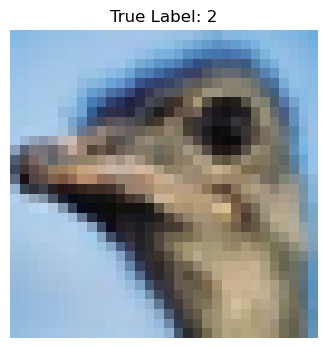

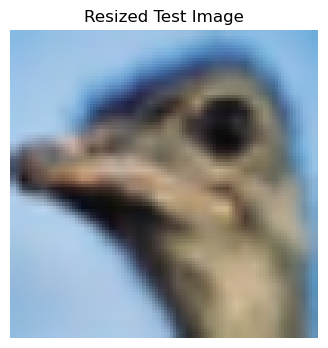

Predicted Label: Bird


In [465]:
import random
import matplotlib.pyplot as plt

# Choose a random test image
random_index = random.randint(0, len(test_images_resized) - 1)
test_image = test_images_resized[random_index]

# Make a prediction
prediction = model.predict(np.expand_dims(test_image, axis=0))
predicted_label = np.argmax(prediction)

# Display the original test image
plt.figure(figsize=(4, 4))
plt.imshow(test_images[random_index])
plt.title(f"True Label: {test_labels[random_index][0]}")
plt.axis('off')
plt.show()

# Display the resized test image
plt.figure(figsize=(4, 4))
plt.imshow(test_image)
plt.title("Resized Test Image")
plt.axis('off')
plt.show()

# Display the model's prediction
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
print(f"Predicted Label: {class_names[predicted_label]}")


In [466]:
# Get the input shape of the fruit_model
input_shape = model.layers[0].input_shape[1:]

print("Input shape of the fruit model:", input_shape)

Input shape of the fruit model: (100, 100, 3)


1/1 [==============================] - 0s 53ms/step


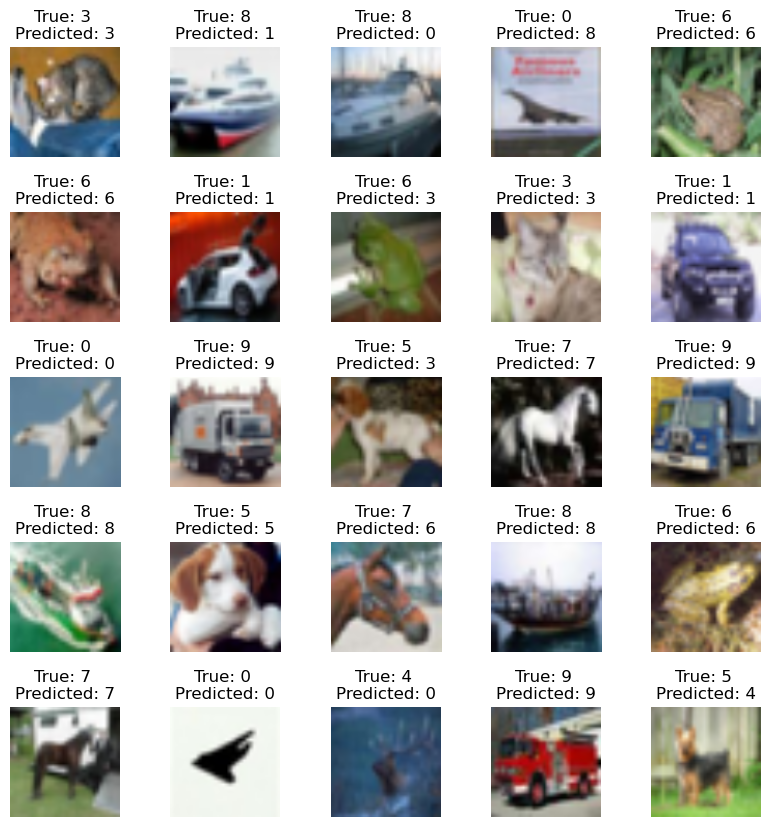

In [468]:

# Plot some sample images along with their predicted labels
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(test_images_resized[i])
    plt.title(f"True: {test_labels[i][0]} \nPredicted: {tf.argmax(model.predict(test_images_resized[i:i+1])[0])}")
    plt.axis('off')
plt.subplots_adjust(hspace=0.5)  # Adjust the vertical space between subplots

plt.show()

In [470]:
##### Bilding fruit model, using base model
from tensorflow.keras.layers import Dropout


num_classes = 33


for layer in model.layers:
    layer.trainable = False


# Create a new model for your fruit classification by adding layers on top of the base model
fruit_model = models.Sequential([
    
#     layers.Input(shape=(100, 100, 3)),  # Input layer for 100x100x3 images
#     layers.experimental.preprocessing.Rescaling(1./255),  # Rescale pixel values to [0, 1]
#     layers.experimental.preprocessing.Resizing(32, 32),  # Resize images to match the base model's input size
    
    model,
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
    
    
    
    
    
    
])

In [471]:
# Compile the model
fruit_model.compile(optimizer='adam', 
                    loss='categorical_crossentropy', 
                    metrics=['accuracy'])

fruit_model.summary()

Model: "sequential_59"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_57 (Sequential)  (None, 10)                6652490   
                                                                 
 flatten_48 (Flatten)        (None, 10)                0         
                                                                 
 dense_187 (Dense)           (None, 512)               5632      
                                                                 
 dense_188 (Dense)           (None, 256)               131328    
                                                                 
 dense_189 (Dense)           (None, 128)               32896     
                                                                 
 dense_190 (Dense)           (None, 33)                4257      
                                                                 
Total params: 6,826,603
Trainable params: 174,113
Non

In [472]:
# Get the input shape of the fruit_model
input_shape = fruit_model.layers[0].input_shape[1:]

print("Input shape of the fruit model:", input_shape)

Input shape of the fruit model: (100, 100, 3)


In [473]:
# Train the model on your dataset
fruit_model.fit(train_ds, epochs=15, validation_data=val_ds)

Epoch 1/15
106/106 [==============================] - 87s 802ms/step - loss: 2.9072 - accuracy: 0.1606 - val_loss: 2.8959 - val_accuracy: 0.1543
Epoch 2/15
106/106 [==============================] - 72s 681ms/step - loss: 2.7103 - accuracy: 0.1741 - val_loss: 2.8671 - val_accuracy: 0.1448
Epoch 3/15
106/106 [==============================] - 44s 417ms/step - loss: 2.6863 - accuracy: 0.1800 - val_loss: 2.8645 - val_accuracy: 0.1581
Epoch 4/15
106/106 [==============================] - 49s 466ms/step - loss: 2.6703 - accuracy: 0.1837 - val_loss: 2.8587 - val_accuracy: 0.1611
Epoch 5/15
106/106 [==============================] - 48s 453ms/step - loss: 2.6574 - accuracy: 0.1863 - val_loss: 2.8615 - val_accuracy: 0.1741
Epoch 6/15
106/106 [==============================] - 47s 439ms/step - loss: 2.6414 - accuracy: 0.1915 - val_loss: 2.8743 - val_accuracy: 0.1646
Epoch 7/15
106/106 [==============================] - 48s 451ms/step - loss: 2.6303 - accuracy: 0.1971 - val_loss: 2.8682 - val_ac

#### End

#### Transfer learining model using pre-trained model VGG

In [474]:
from tensorflow.keras.applications import VGG16

# Load the VGG16 model with weights pre-trained on ImageNet
base_model = VGG16(weights='imagenet', 
                   include_top=False, 
                   input_shape=(100, 100, 3))


In [475]:
# Freeze all layers in the base model
for layer in base_model.layers:
    layer.trainable = False


In [476]:
from tensorflow.keras.layers import Flatten, Dense

start_time = time.time()



# Create a new model with the pre-trained base and custom classification layers
model = tf.keras.models.Sequential([
    base_model,
#     layers.Conv2D(256, (3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(512, (3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
    Flatten(),
    Dense(1024, activation='relu'),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(33, activation='softmax')  # Change the number of units to 5628
])




end_time = time.time()
elapsed_time = end_time - start_time

print(f"Model built in {elapsed_time:.2f} seconds")

Model built in 0.40 seconds


In [477]:
model.summary()

Model: "sequential_60"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 3, 3, 512)         14714688  
                                                                 
 flatten_49 (Flatten)        (None, 4608)              0         
                                                                 
 dense_191 (Dense)           (None, 1024)              4719616   
                                                                 
 dense_192 (Dense)           (None, 512)               524800    
                                                                 
 dense_193 (Dense)           (None, 256)               131328    
                                                                 
 dense_194 (Dense)           (None, 128)               32896     
                                                                 
 dense_195 (Dense)           (None, 33)              

In [478]:
# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [479]:

# Train the model on your dataset
model.fit(train_ds, epochs=5, validation_data=val_ds)

Epoch 1/5
106/106 [==============================] - 1129s 11s/step - loss: 0.5995 - accuracy: 0.8442 - val_loss: 0.3796 - val_accuracy: 0.8810
Epoch 2/5
106/106 [==============================] - 1925s 18s/step - loss: 0.0060 - accuracy: 0.9996 - val_loss: 0.3248 - val_accuracy: 0.9009
Epoch 3/5
106/106 [==============================] - 1111s 10s/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.3447 - val_accuracy: 0.8947
Epoch 4/5
106/106 [==============================] - 1016s 10s/step - loss: 6.0054e-04 - accuracy: 1.0000 - val_loss: 0.3329 - val_accuracy: 0.9015
Epoch 5/5
106/106 [==============================] - 871s 8s/step - loss: 3.9052e-04 - accuracy: 1.0000 - val_loss: 0.3423 - val_accuracy: 0.8980


In [ ]:

# Evaluate the model on the test dataset
loss, accuracy = model.evaluate(train_ds)
print("Test accuracy:", accuracy)


# Testing models

#### Testing transfer learning model using VGG as base model

1/1 [==============================] - 0s 100ms/step


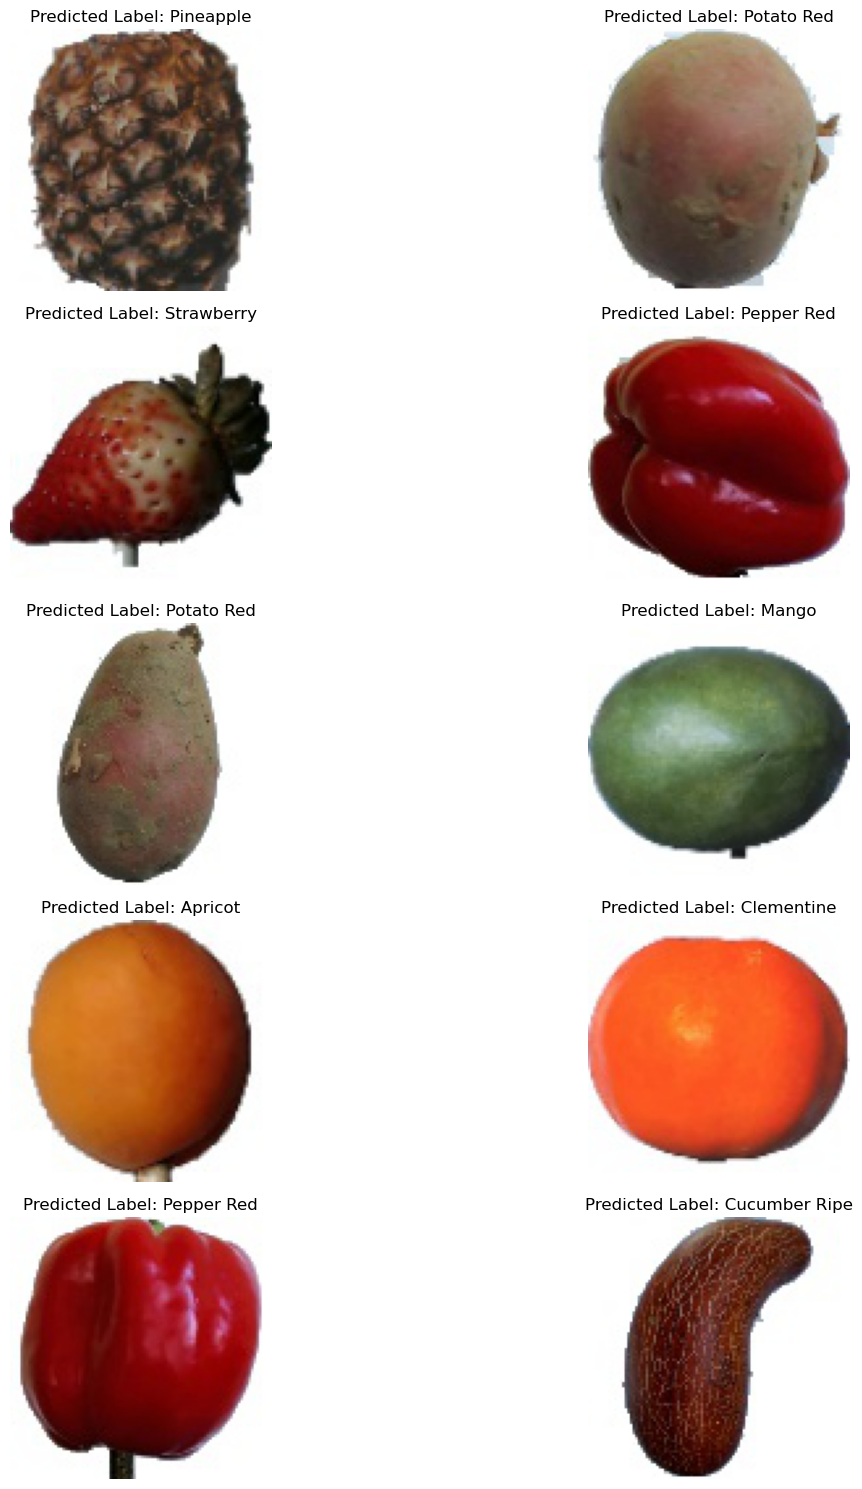

In [480]:


# # Usage
model = model

# # Path to the CSV file containing the test dataset
csv_file = csv_file

# # Plot random predictions using the defined function
plot_random_predictions(model, csv_file)

#### End

#### Testing Self-build base model using CIFAR-10 for transfer learning

1/1 [==============================] - 0s 28ms/step


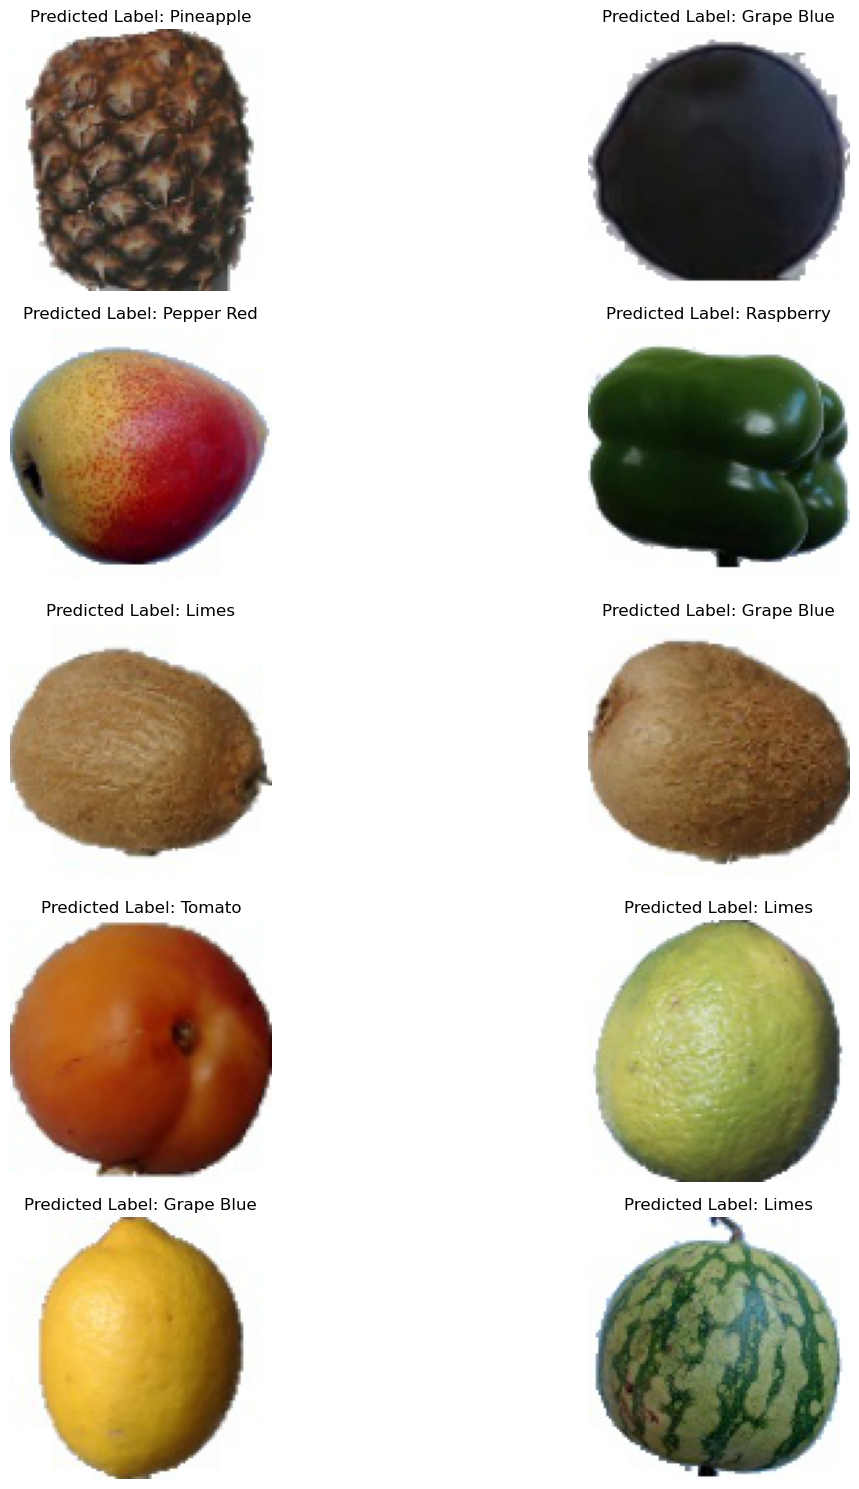

In [481]:

# # Usage
fruit_model = fruit_model

# # Path to the CSV file containing the test dataset
csv_file = csv_file

# # Plot random predictions using the defined function
plot_random_predictions(fruit_model, csv_file)

#### testing the Self-built model without transfere learning

1/1 [==============================] - 0s 64ms/step


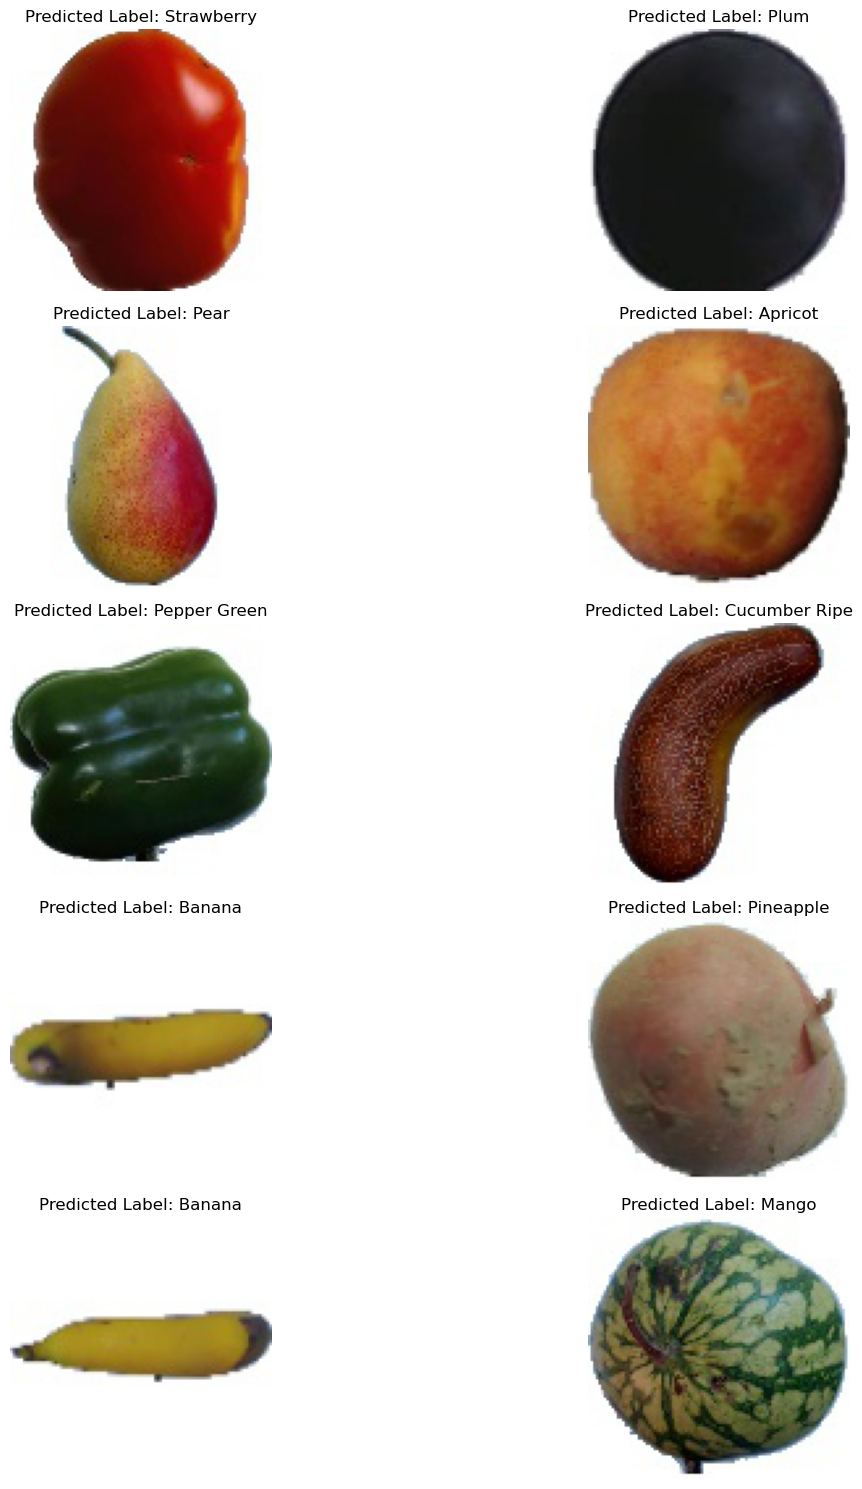

In [482]:


# # Usage
deeper_model = deeper_model

# # Path to the CSV file containing the test dataset
csv_file = csv_file

# # Plot random predictions using the defined function
plot_random_predictions(deeper_model, csv_file)

#### End

#### Testing more shallower model without transfer learning

1/1 [==============================] - 0s 69ms/step


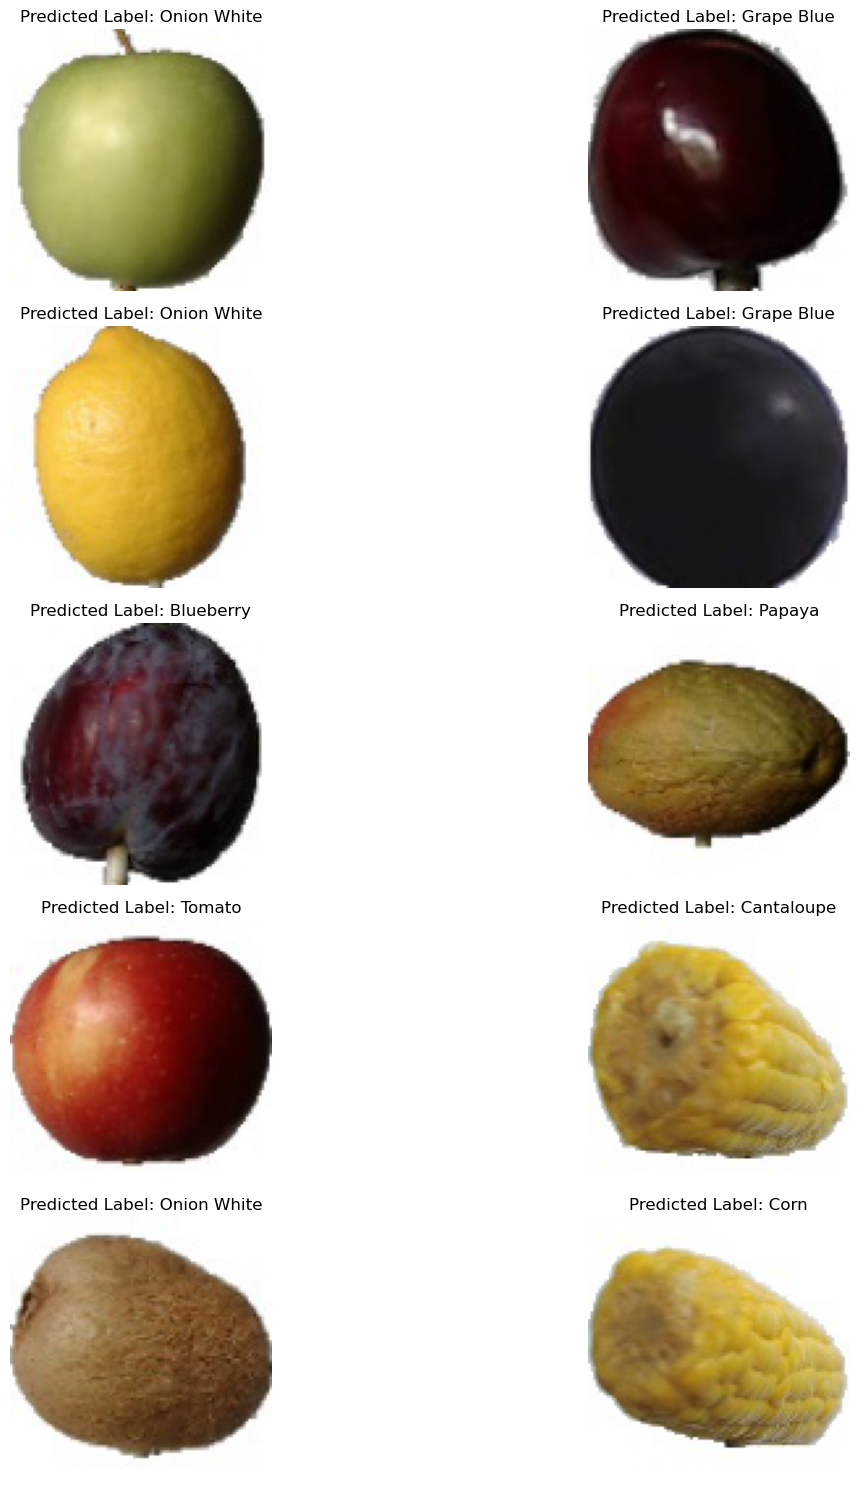

In [487]:


# # Usage
shallower_cnn_model = shallower_cnn_model

# # Path to the CSV file containing the test dataset
csv_file = csv_file

# # Plot random predictions using the defined function
plot_random_predictions(shallower_cnn_model, csv_file)

1/1 [==============================] - 0s 59ms/step


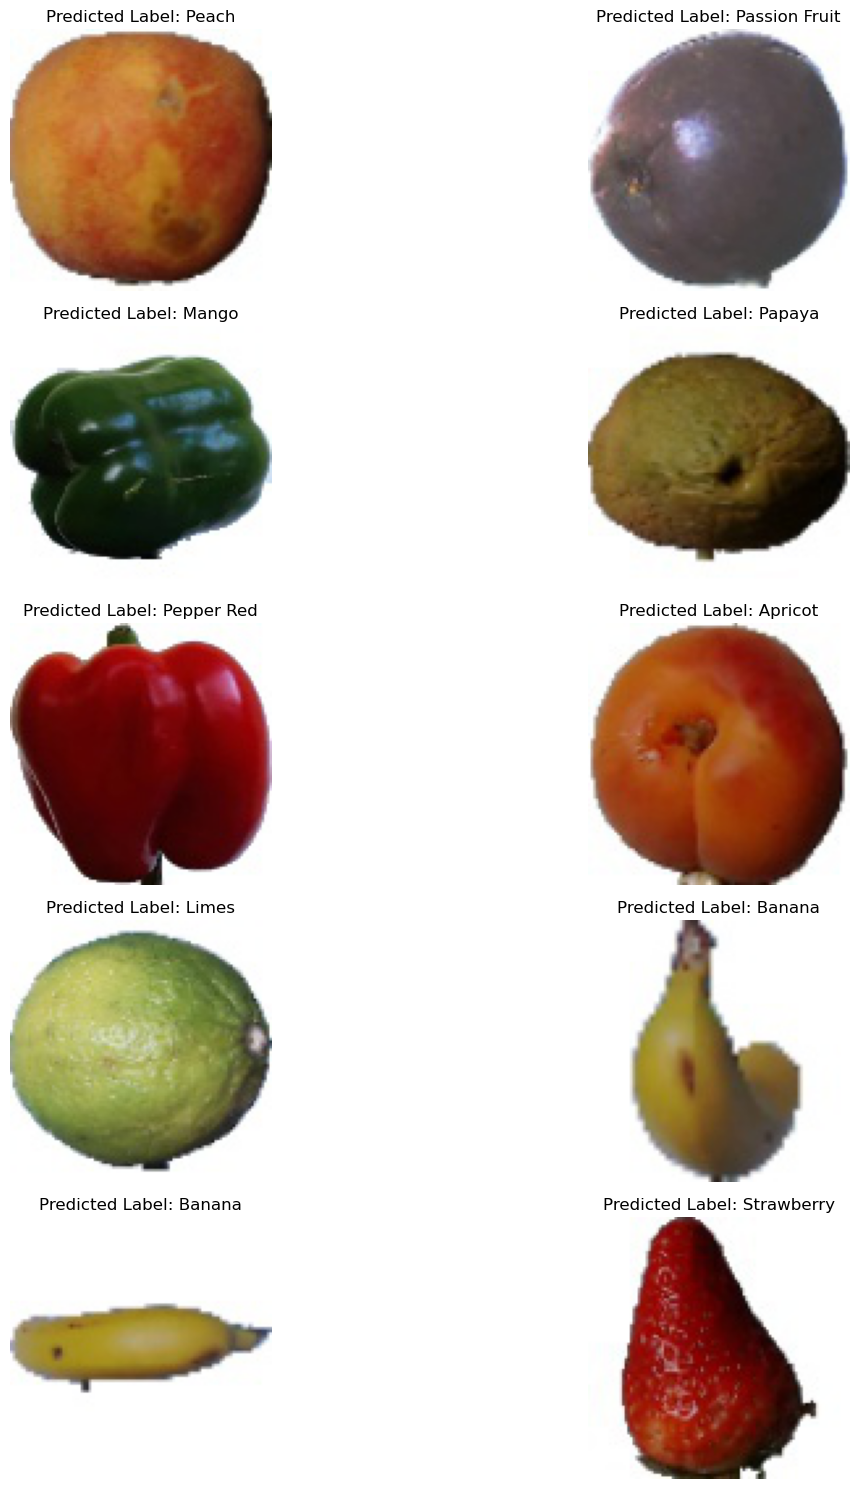

In [500]:






# # Usage
custom_model = custom_model

# # Path to the CSV file containing the test dataset
csv_file = csv_file

# # Plot random predictions using the defined function
plot_random_predictions(custom_model, csv_file)

1/1 [==============================] - 0s 32ms/step


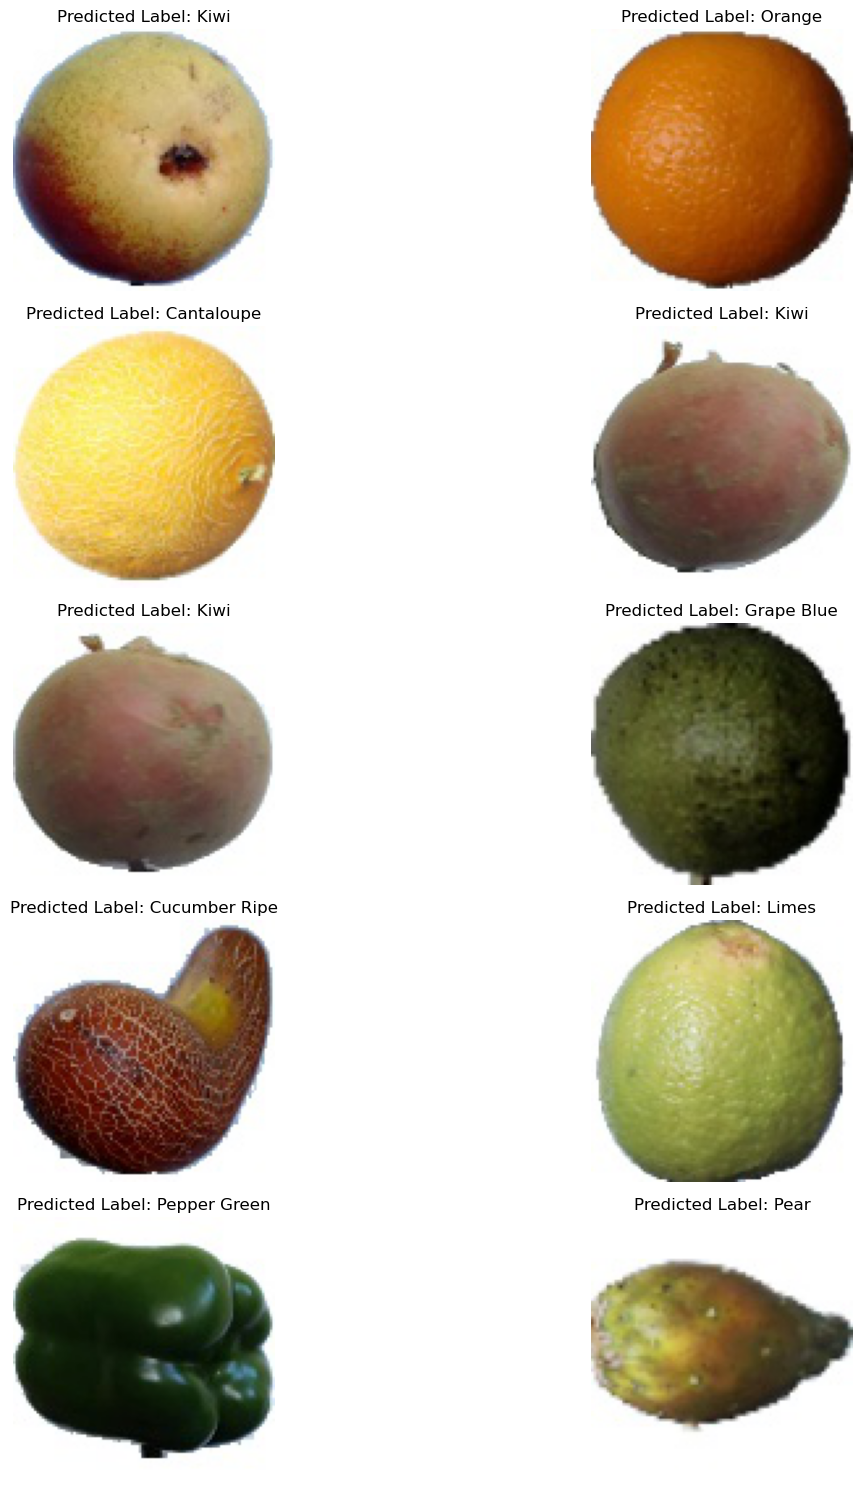

In [508]:
original_model









# # Usage
custom_model = original_model

# # Path to the CSV file containing the test dataset
csv_file = csv_file

# # Plot random predictions using the defined function
plot_random_predictions(custom_model, csv_file)

### End